## transforming data
-----------------------------------------------------
- Which of the factors contributes the most for the happiness score ?

in oreder to answer this question we need to transfer our data to easier format that helps to answer this question

we will explore some functions `Series.map() , Series.apply(), df.applymap(), df.apply(), df.melt()`

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we will work with happiness report 2015 only this mission 
happiness_2015 = pd.read_csv("World_Happiness_2015.csv")
happiness_2015.head()



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


we will choose some columns to work with 

In [2]:
# renaming some columns 

mapping = {"Economy (GDP per Capita)" : "Economy",
          "Health (Life Expectancy)" : "Health" , 
          "Trust (Government Corruption)" : "Trust"}

happiness_2015.rename(mapping , axis = 1, inplace = True)

happiness_2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# focus more on the columns we will work with 

happiness_2015 = happiness_2015[['Country',  'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity' , "Dystopia Residual"]]

happiness_2015.head()

,Country,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


- each column contributes to the happiness score but because it seems hard to analyze all of these numbers we can convert them to easier format let's see how will we do it 

- we will convert any number greater than 1 to **High** and less than 1 to **low**

- with the help of function element wise using `Series.map() , Series.apply()`

In [4]:
# build a funcrion first 
def label(label):
    if label > 1:
        label = "High"
    else:
        label = "Low"
    return label 

# use apply() an map() to apply the function on a series e.g Economy
economy_empact_map = happiness_2015["Economy"].map(label)

economy_impact_apply = happiness_2015["Economy"].apply(label)

In [5]:
# check the values
print(economy_empact_map.value_counts())
print(economy_impact_apply.value_counts())

Low     92
High    66
Name: Economy, dtype: int64
Low     92
High    66
Name: Economy, dtype: int64


In [6]:
# another way to check using Series.equals() checking
economy_empact_map.equals(economy_impact_apply)

True

- here both methods can apply function element wise to a series but let's see the difference when we want to apply function with more than one **argument**

In [7]:
def label(label , x):
    if label > x:
        label = "High"
    else:
        label = "Low"
    return label

# try map() will raise an error 
# happiness_2015["Economy"].map(label , x = 0.8)

In [8]:
# check for apply()

economy_impact_apply = happiness_2015["Economy"].apply(label , x = 0.8)
economy_impact_apply.value_counts()

High    93
Low     65
Name: Economy, dtype: int64

In [9]:
# apply for more than one column 
economy_impact = happiness_2015["Economy"].apply(label , x = 1)
freedom_impact = happiness_2015["Freedom"].apply(label , x= 1)
family_impact = happiness_2015["Family"].apply(label , x = 1)


freedom_impact.value_counts()

Low    158
Name: Freedom, dtype: int64

**what about making the work easier with pandas and apply functios for multiple columns in just one line `DataFrame.applymap()` method**

In [10]:
# do it in just one line 
factors = ["Happiness Score" , "Economy",
           "Family" ,"Health" ,"Freedom" ,"Trust", "Generosity" , "Dystopia Residual"]

# apply the function df.applymap()

def label(label):
    if label > 1:
        return "High"
    else:
        return "Low"
    
factors_impact = happiness_2015[factors].applymap(label)

factors_impact.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,High,High,High,Low,Low,Low,Low,High
1,High,High,High,Low,Low,Low,Low,High
2,High,High,High,Low,Low,Low,Low,High
3,High,High,High,Low,Low,Low,Low,High
4,High,High,High,Low,Low,Low,Low,High


there is `df.apply()` function also but it is different in behaviour

-**be careful here cause it works with the functions that can work with Series not element wise like `pd.value_counts()` this function can work ith columns like what we will see but `label()` will give an error**

In [11]:
# using value_counts() here is better to show
factors_impact.apply(pd.value_counts)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
High,158.0,66,89,2,NaN,NaN,NaN,151
Low,NaN,92,69,156,158.0,158.0,158.0,7


In [12]:
# raising an error 
# happiness_2015[factors].apply(label)

- try to practise and build a new function that calculate the percentage of each value in a column 

In [13]:
def v_counts(column):
    num = column.value_counts()
    size = column.size
    
    return num / size


# apply on dataframe 
factors_impact.apply(v_counts)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
High,1.0,0.417722,0.563291,0.012658,NaN,NaN,NaN,0.955696
Low,NaN,0.582278,0.436709,0.987342,1.0,1.0,1.0,0.044304


build a function that convert each column value to a percentage 

In [14]:
factors = ["Happiness Score" , "Economy",
           "Family" ,"Health" ,"Freedom" ,"Trust", "Generosity" , "Dystopia Residual"]

def percent(col):
    div = col / happiness_2015["Happiness Score"]
    return div * 100

factor_percentage = happiness_2015[factors].apply(percent)

factor_percentage.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,100.0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,100.0,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,100.0,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,100.0,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,100.0,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


### melting dataframes

In [15]:
main_cols = ["Country" , "Happiness Score"]
factors = [ 'Economy', 'Family','Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']


melt = pd.melt(happiness_2015 , id_vars= main_cols, value_vars= factors)

melt  # make it longer not wider

,Country,Happiness Score,variable,value
0,Switzerland,7.587,Economy,1.39651
1,Iceland,7.561,Economy,1.30232
2,Denmark,7.527,Economy,1.32548
3,Norway,7.522,Economy,1.45900
4,Canada,7.427,Economy,1.32629
...,...,...,...,...
1101,Rwanda,3.465,Dystopia Residual,0.67042
1102,Benin,3.340,Dystopia Residual,1.63328
1103,Syria,3.006,Dystopia Residual,0.32858
1104,Burundi,2.905,Dystopia Residual,1.83302


In [16]:
melt["percentage"] = round(melt["value"] / melt["Happiness Score"] * 100 , 2)

melt.head()

,Country,Happiness Score,variable,value,percentage
0,Switzerland,7.587,Economy,1.39651,18.41
1,Iceland,7.561,Economy,1.30232,17.22
2,Denmark,7.527,Economy,1.32548,17.61
3,Norway,7.522,Economy,1.45900,19.40
4,Canada,7.427,Economy,1.32629,17.86


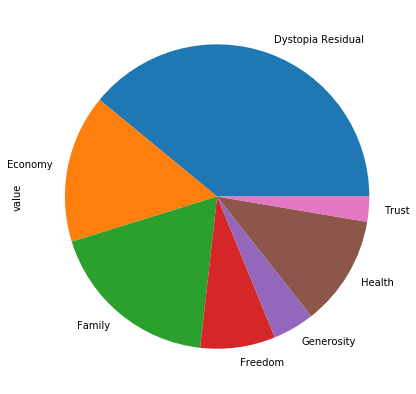

In [20]:
piv_melt = melt.pivot_table(index = "variable" , values = "value" , aggfunc= "mean")

piv_melt.plot(kind = "pie" , y = "value" , legend = False, figsize = (10,7))

In [19]:
# unmelt the data to columns 
